In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
iris = pd.read_csv('E:\DATA SETS\Iris\iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


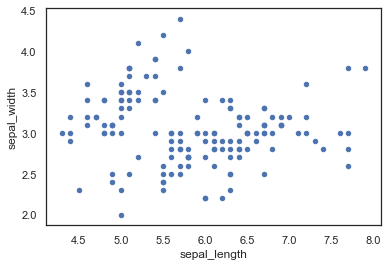

In [6]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')

# Seaborn

## Facet Grid


This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

In [17]:
tips = sns.load_dataset('tips')

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


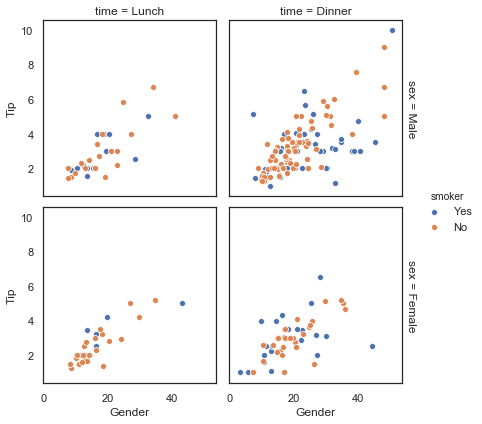

In [43]:
sns.FacetGrid(tips, col = 'time', row = 'sex', hue = 'smoker', margin_titles=True, despine=False) \
.map(sns.scatterplot, "total_bill", 'tip') \
.set_axis_labels('Gender', 'Tip') \
.add_legend()

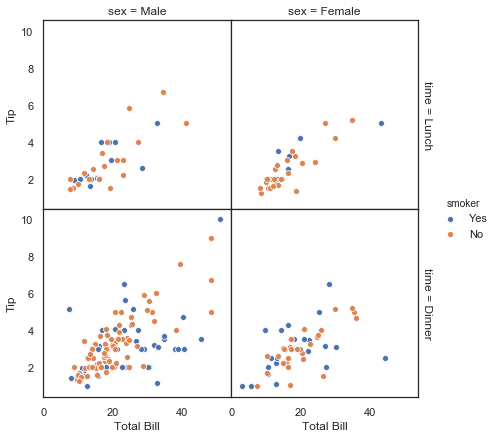

In [50]:
sns.FacetGrid(tips, col = 'sex', row = 'time', margin_titles=True, despine=False, hue = 'smoker') \
.map_dataframe(sns.scatterplot, x = "total_bill", y= 'tip') \
.set_axis_labels('Total Bill', 'Tip') \
.add_legend() \
.fig.subplots_adjust(wspace=0, hspace=0)


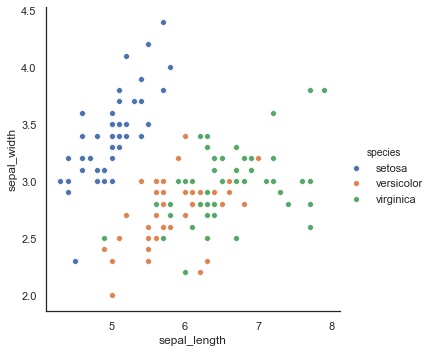

In [16]:
sns.FacetGrid(iris, hue = 'species', size = 5) \
.map(sns.scatterplot, 'sepal_length', 'sepal_width') \
.add_legend()

## Boxplot 

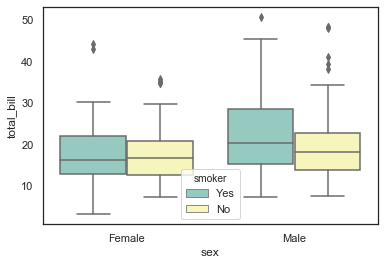

In [70]:
# orient ='h'

sns.boxplot(x = 'sex', y= 'total_bill', data = tips, hue="smoker", palette = 'Set3',
            order=["Female", "Male"])

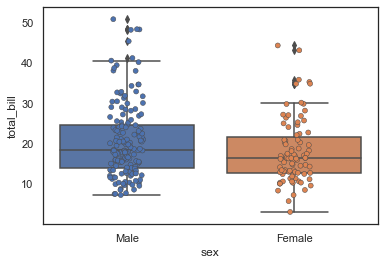

In [110]:
sns.boxplot(x = 'sex', y= 'total_bill', data = tips)
sns.stripplot(x = 'sex', y= 'total_bill', data = tips, jitter =True, edgecolor = 'gray', linewidth=0.5)

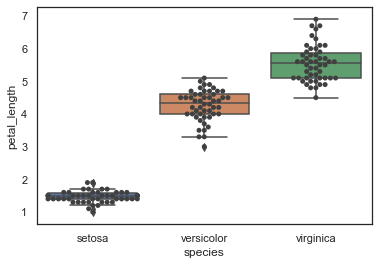

In [102]:
sns.boxplot(x = 'species', y= 'petal_length', data = iris)
sns.swarmplot(x = 'species', y= 'petal_length', data = iris, color ="0.25")

### Catplot


This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

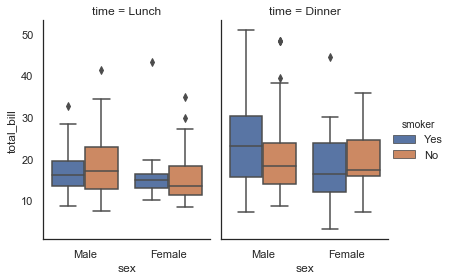

In [82]:
sns.catplot(x='sex', y ='total_bill', 
           hue = 'smoker', col = 'time',
           data = tips, kind = 'box',
           height = 4, aspect =0.7)

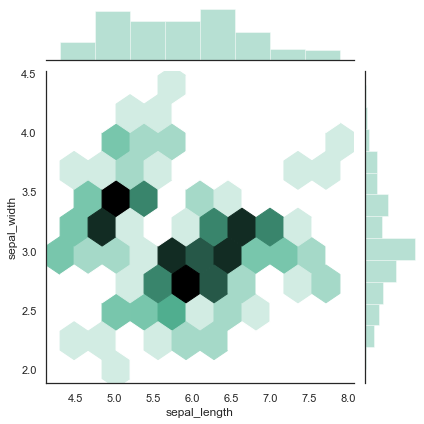

In [14]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris, size = 6, kind="hex", color="#4CB391")